# Getting Jupyter notebooks running 
Before you can use jupyter notebooks you have to set up a python environment.

Here we will use the [conda](https://docs.conda.io/en/latest/index.html) package-management system 
which is a quick and easy way to get everything up and running within a couple of minutes.

It will take care of the following tasks:

- create and manage any number of virtual (isolated) python environments
- install packages and manage requirements

## <font color='red'> Installing python / jupyter notebook </font>

### option 1: the fast and minimalistic way (using miniconda)
 Miniconda is a minimal distribution of conda which installs just the basic tools and nothing else ($\Rightarrow$ small filesize, quick install)

1. go to (https://docs.conda.io/en/latest/miniconda.html), download and install the miniconda executable for your operating system
    - in case you don't want to add the miniconda-directory to your *PATH* environment-variable (e.g. if you don't have user-rights)  
    miniconda comes with it's own terminal called  "Anaconda Prompt (miniconda3)".

2. open a terminal (or Anaconda Prompt) and execute the following commands to set everything up:

    - create a new environment using **python 3.6** called **jupyter_test** (or any name you like):

            conda create -n jupyter_test python=3.6

    - activate the environment and install required packages:
        - *jupyter* (for jupyter notebooks)
        - *numpy* (for basic mathematics)
        - *matplotlib* (for plotting)
        - *ipympl* (for interactive plots)
        - *rise* (to turn your notebook into a presentation with 1 click)
        
                activate jupyter_test
                conda install jupyter numpy matplotlib ipympl rise

3. to start an interactive Ipython session in your default browser, navigate to your working directory and type: 

        jupyter notebook  

4. open an existing notebook or create a new notebook by clicking "**new** $\rightarrow$ **Python 3**" on the top right (as indicated in the image below)
<center><img src="new_notebook.png" alt="create new notebook image"></center>

### option 2: the slow and simple way (using full anaconda package)
Anaconda provides you with a [variety of pre-installed python packages](https://docs.anaconda.com/anaconda/packages/pkg-docs/) in your *(base)* environment so you can start right away ($\Rightarrow$ large filesize, slow install)


1. go to (https://www.anaconda.com/distribution/#download-section), downoad and install **Anaconda** (python 3.7)
2. open a terminal (or Anaconda Prompt), navigate to your working directory and type

        jupyter notebook
   to start an interactive Ipython session in your default browser
   
3. you might still want to follow steps 2-4 from **option 1** to have a dedicated environment (but it's not mandatory)
   

## <font color='red'> Jupyter notebook basics</font>

Jupyter notebooks combine simple text formatting using [Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#) with executable code-cells that can print the output directly into the notebook.

### some facts
- is all free, open source and available for PC, Mac and Linux

- Notebooks can be exported as HTML, pdf, etc.

- a Jupyter Notebook can easily be turned into an interactive presentation by using [RISE](https://rise.readthedocs.io/en/maint-5.6/)

- Jupyter Notebooks can be set up to run on a remote computer  
  (you can use the user-rights and computational power of a remote machine  
  while editing the Notebook in your local browser)

- GitHub can render (static) notebooks


- using jupyter-notebook-extensions some additional tweaks are possible like
    - hiding code-cells (leaving a nice plain presentation)
    - splitting cells
    - ...

### Markdown 
- ... is a very simple syntax that can be used to apply basic text-formatting
    - can render $\LaTeX$, so equations like $\sqrt{\frac{x^2+y^2}{2}}$ etc. can be written nicely
    - supports <font color=green, style='border:2px blue dashed; font-size:15px; padding:2px'> HTML</font>  formatting
    
    - supports syntax-highliting
        ```python
        import numpy as np
        def some_function(x, y, z):
            val = x + y + z
            if x is not None:
                print(x)
        ```
    
    - some quick introductions can be found here:
        - [3 minute markdown introduction](https://guides.github.com/features/mastering-markdown/)
        - [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
        - [jupyter-documentation](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#)

### Code-cells

- are intended to run `python`-code (but can also be configured to use other languages like HTML, java, C++, R etc.)
    - generation of **static** and **dynamic** plots
    - code cells can be hidden so that just the output is shown in the notebook
---

You can **switch the cell-type** by clicking "Cell" $\rightarrow$ "Cell-type" or using **keyboard-shortcuts**:

- Toggle cell to Markdown: &emsp;   Esc + m
- Toggle cell to Code: &nbsp;&emsp;&emsp;&emsp; Esc + y

You can **execute a cell** by clicking the "Run" button or typing
- Execute current cell: &emsp;&emsp;&emsp; Shift + Enter

## <font color='red'> Some python examples</font>

some introductory notes on python can be found here:
- [Scipy lecture notes](https://scipy-lectures.org/)
- [w3schools - python tutorial](https://www.w3schools.com/python/)

### Static images

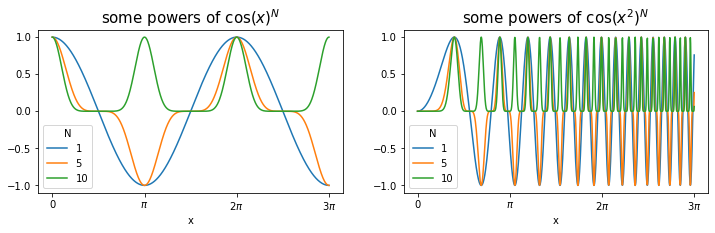

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# use the 'inline' backend of matplotlib to generate static images
%matplotlib inline

n_pi = 3
x = np.linspace(0., n_pi, 1000) * np.pi
f, [ax1,ax2] = plt.subplots(1, 2, 
                            figsize=(12, 3))
ax1.set_title('some powers of $\cos(x)^N$', fontsize=15)
ax2.set_title(r'some powers of $\cos\left(x^2\right)^N$', fontsize=15)
for N in [1,5,10]:
    l, = ax1.plot(x, np.cos(x)**N, label=N)
    l, = ax2.plot(x, np.sin(x**2)**N, label=N)
for ax in [ax1, ax2]:
    _ = ax.set_xticks(np.arange(n_pi + 1) * np.pi)
    _ = ax.set_xticklabels(['0', '$\pi$'] + [f'{i}$\pi$' for i in np.arange(2, n_pi + 1)])
    
    _ = ax.legend(title='N')
    _ = ax.set_xlabel('x')

### pre-render animations and export to HTML

In [6]:
from matplotlib import animation
from IPython.display import HTML, display

def generate_animation():
    n_pi = 5
    x = np.linspace(0., n_pi * np.pi, 100)

    f, ax = plt.subplots(figsize=(14,4))
    l1, = ax.plot(x, np.cos(x), lw=0.5)
    l2, = ax.plot(x, np.cos(x), marker='.', lw=0.5, label=r'$\cos(x)$')

    _ = ax.set_xticks(np.arange(n_pi + 1) * np.pi)
    _ = ax.set_xticklabels(['0', '$\pi$'] + [f'{i}$\pi$' for i in np.arange(2, n_pi + 1)])

    def animate(frame):
        N = frame/50.
        new_data = np.cos(x**N)
        l1.set_ydata(new_data)
        l1.set_label(f'$\cos(x^{{{N}}})$')
        ax.legend(loc='lower left', fontsize=12)
        return [l1]

    anim = animation.FuncAnimation(f, animate, 
                                   frames=50, interval=50, 
                                   blit=True)

    display(HTML(anim.to_jshtml()))
    plt.close(f)

generate_animation()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### generate dynamic widgets  
(only works when the notebook is actually executed)

In [4]:
try:
    %matplotlib widget
    %matplotlib widget
except:
    print('You must install "ipympl" first to be able to generate dynamic plots !!!')
    
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

n_pi = 5
x = np.linspace(0., n_pi * np.pi, 100)

f, ax = plt.subplots(figsize=(2,50), num='An interactive figure')
f.canvas.layout.width = '100%'
f.canvas.layout.height= '3in'
l1, = ax.plot(x, np.cos(x), lw=0.75)
l2, = ax.plot(x, np.cos(x), marker='.', lw=0.75, label=r'$\cos(x)$')

_ = ax.set_xticks(np.arange(n_pi + 1) * np.pi)
_ = ax.set_xticklabels(['0', '$\pi$'] + [f'{i}$\pi$' for i in np.arange(2, n_pi + 1)])


@interact(show_dots=True, show_lines=True, N_1=(0, 1.5, .05), N_2=(0, 1.5, .05))
def g(show_dots, show_lines, N_1, N_2):   
    new_data_1 = np.cos(x**N_1)
    l1.set_ydata(new_data_1)
    l1.set_label(f'$\cos(x^{{{N_1}}})$')
    
    
    new_data_2 = np.cos(x**N_2)
    l2.set_ydata(new_data_2)
    l2.set_label(f'$\cos(x^{{{N_2}}})$')

    for l in [l1, l2]:
        if show_dots: 
            l.set_marker('.')
        else:          
            l.set_marker(None)

        
        if show_lines: 
            l.set_linewidth(0.75)
        else:
            l.set_linewidth(0.)
    ax.legend(loc='lower left', fontsize=12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(Checkbox(value=True, description='show_dots'), Checkbox(value=True, description='show_li…